In [2]:
import pandas as pd
import numpy as np

In [3]:
Prod1 = pd.read_csv("ProdL1_202301121021.csv", sep = ";")
Prod1

,data,temp_iso,temp_pol1,temp_pol2,temp_recirc_iso,temp_recirc_pol,pres_pol,pres_iso,pres_recirc_cat1,pres_recirc_cat2,...,bomba_cat3,manual_bomba_recirc_iso,manual_bomba_recirc_pol,manual_bomba_pent,manual_bomba_cat1,manual_bomba_cat2,manual_bomba_cat3,manual_bomba_agitador_pol1,manual_bomba_agitador_iso,manual_bomba_filtro_iso
0,2022-10-24 10:40:14.000,25.7,27.1,26.4,24.1,25.4,0.0,0.0,1.5,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-24 10:40:24.000,25.7,27.1,26.4,24.2,25.4,0.0,0.0,1.5,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-24 10:40:34.000,25.7,27.1,26.3,24.2,25.4,0.0,0.0,1.5,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-24 10:40:44.000,25.6,27.5,26.3,24.2,25.3,0.0,0.0,1.5,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-24 10:40:54.000,25.7,27.7,26.3,24.1,25.4,0.0,0.0,1.5,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614830,2023-01-12 10:35:02.000,23.1,24.5,21.4,17.8,17.5,0.0,0.0,1.4,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614831,2023-01-12 10:35:12.000,23.1,24.5,21.4,17.9,17.5,0.0,0.0,1.4,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614832,2023-01-12 10:35:22.000,23.1,24.5,21.3,17.7,17.5,0.0,0.0,1.4,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614833,2023-01-12 10:35:33.000,23.1,24.5,21.3,17.7,17.5,0.0,0.0,1.4,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se elimina de los datos columnas que tengan datos no relevantes o no tratables por el algoritmo, como por ejemplo fechas.

In [4]:
Prod1 = Prod1.drop(columns = 'data', axis = 1)

Se comprueba si hay más variables que tengan el mismo valor siempre o sean categóricas

In [5]:
for i in range(0,len(Prod1.loc[0])):
    print(i,": ",len(Prod1.iloc[:,i].unique()))

0 :  121
1 :  192
2 :  123
3 :  157
4 :  141
5 :  1
6 :  1
7 :  18
8 :  11
9 :  11
10 :  122
11 :  114
12 :  114
13 :  178
14 :  203
15 :  166
16 :  682
17 :  588
18 :  2509
19 :  590
20 :  1178
21 :  1
22 :  1
23 :  360
24 :  705
25 :  15
26 :  510
27 :  789
28 :  750
29 :  143
30 :  674
31 :  253273
32 :  259300
33 :  1
34 :  257633
35 :  159629
36 :  115356
37 :  115247
38 :  22822
39 :  1
40 :  39306
41 :  118559
42 :  2185
43 :  2096
44 :  3
45 :  3
46 :  3
47 :  2
48 :  3
49 :  3
50 :  2
51 :  3
52 :  3
53 :  2
54 :  3
55 :  3
56 :  2
57 :  3
58 :  3
59 :  2
60 :  3
61 :  3
62 :  3
63 :  3
64 :  3
65 :  3
66 :  3
67 :  3
68 :  3
69 :  3
70 :  3
71 :  3
72 :  3
73 :  3
74 :  3
75 :  3
76 :  3
77 :  2
78 :  2


Se observa que las siguientes columnas tienen un unico valor o son categoricos: 5, 6, 21, 22, 33, 39, 44-78. Se procedió a eliminar dichas columnas.

In [6]:
columns = [5,6,21,22,33,39]
for i in range(44, 79):
    columns.append(i)
Prod1 = Prod1.drop(columns=Prod1.columns[columns], axis = 1)
Prod1

,temp_iso,temp_pol1,temp_pol2,temp_recirc_iso,temp_recirc_pol,pres_recirc_cat1,pres_recirc_cat2,pres_recirc_cat3,pres_alimentacion_pol,pres_alimentacion_iso,...,consumo_total_pol1,consumo_total_iso,consumo_total_cat1,consumo_total_cat2,consumo_total_pent,consumo_parcial_pol1,consumo_parcial_iso,consumo_parcial_cat1,consumo_parcial_cat2,consumo_parcial_pent
0,25.7,27.1,26.4,24.1,25.4,1.5,1.6,1.1,3.9,2.5,...,86956.9,126407.4,126902.8,3680.8,3910.3,467.4,728.8,0.0,18.3,17.6
1,25.7,27.1,26.4,24.2,25.4,1.5,1.6,1.1,4.0,2.5,...,86958.1,126409.1,126902.8,3680.9,3910.4,468.5,730.6,0.0,18.4,17.7
2,25.7,27.1,26.3,24.2,25.4,1.5,1.6,1.1,4.1,2.5,...,86959.3,126410.9,126902.8,3680.9,3910.4,469.6,732.3,0.0,18.4,17.7
3,25.6,27.5,26.3,24.2,25.3,1.5,1.6,1.1,3.9,2.5,...,86960.5,126412.6,126902.8,3681.0,3910.5,470.6,734.0,0.0,18.5,17.8
4,25.7,27.7,26.3,24.1,25.4,1.5,1.6,1.1,4.0,2.5,...,86961.7,126414.3,126902.8,3681.0,3910.5,471.8,735.8,0.0,18.5,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614830,23.1,24.5,21.4,17.8,17.5,1.4,1.6,1.1,1.5,3.1,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0
614831,23.1,24.5,21.4,17.9,17.5,1.4,1.6,1.1,1.5,3.4,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0
614832,23.1,24.5,21.3,17.7,17.5,1.4,1.6,1.1,1.5,3.2,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0
614833,23.1,24.5,21.3,17.7,17.5,1.4,1.6,1.1,1.5,3.2,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.model_selection import train_test_split
from sklearn import svm

Se rellena los datos en los que no se tienen valores con el dato anterior a dicha observación 'missing'.

In [7]:
X = Prod1
X = X.fillna(method='bfill', axis=0)
# X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

A mayores escalamos los datos con un minmaxscaler

In [63]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
Scaler.fit(X)
X = pd.DataFrame(Scaler.transform(X))
X

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.408333,0.544503,0.721311,0.551282,0.728571,0.882353,0.9,1.0,0.181818,0.047619,...,0.000000,0.000000,0.0,0.000000,0.000000,0.152675,0.147259,0.0,0.083791,0.084010
1,0.408333,0.544503,0.721311,0.557692,0.728571,0.882353,0.9,1.0,0.189394,0.047619,...,0.000005,0.000004,0.0,0.000008,0.000008,0.153035,0.147623,0.0,0.084249,0.084487
2,0.408333,0.544503,0.713115,0.557692,0.728571,0.882353,0.9,1.0,0.196970,0.047619,...,0.000009,0.000009,0.0,0.000008,0.000008,0.153394,0.147966,0.0,0.084249,0.084487
3,0.400000,0.565445,0.713115,0.557692,0.721429,0.882353,0.9,1.0,0.181818,0.047619,...,0.000014,0.000013,0.0,0.000016,0.000016,0.153721,0.148310,0.0,0.084707,0.084964
4,0.408333,0.575916,0.713115,0.551282,0.728571,0.882353,0.9,1.0,0.189394,0.047619,...,0.000018,0.000017,0.0,0.000016,0.000016,0.154112,0.148673,0.0,0.084707,0.084964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614830,0.191667,0.408377,0.311475,0.147436,0.164286,0.823529,0.9,1.0,0.000000,0.076190,...,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
614831,0.191667,0.408377,0.311475,0.153846,0.164286,0.823529,0.9,1.0,0.000000,0.090476,...,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
614832,0.191667,0.408377,0.303279,0.141026,0.164286,0.823529,0.9,1.0,0.000000,0.080952,...,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
614833,0.191667,0.408377,0.303279,0.141026,0.164286,0.823529,0.9,1.0,0.000000,0.080952,...,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [64]:
import pickle

#Para guardar el modelo
ScalerPickle = open('L1Scaler', 'wb') 
      
# source, destination 
pickle.dump(Scaler, ScalerPickle)  

# close the file
ScalerPickle.close()
                
      
# load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

## K-Vecinos
Se ajusta un modelo de K-vecinos no supervisado.

In [65]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

nbrs = NearestNeighbors(n_neighbors = 10)
nbrs.fit(X)

NearestNeighbors(n_neighbors=10)

In [66]:
import pickle

#Para guardar el modelo
knnPickle = open('L1KNNModel', 'wb') 
      
# source, destination 
pickle.dump(nbrs, knnPickle)  

# close the file
knnPickle.close()
                
# load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

Se obtiene los datos de la media de las distancias de cada observación al resto de observaciones, obteniendo así una valor de distancia por cada observación.

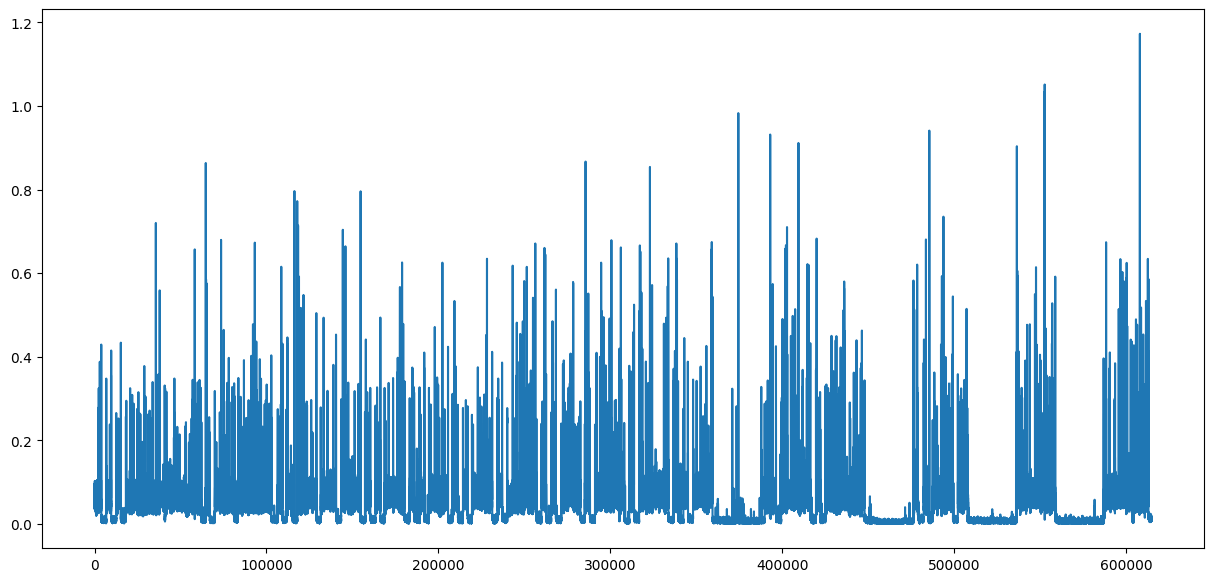

In [67]:
distances, indexes = nbrs.kneighbors(X)
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [68]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0         0.064842
1         0.054444
2         0.052968
3         0.048459
4         0.047316
            ...   
614830    0.012190
614831    0.010681
614832    0.013375
614833    0.008086
614834    0.008102
Length: 614835, dtype: float64

Asumiendo que un 0.1% de los datos son defectuosos, se obtiene la distancia que corresponde con el percentil 99.9 para obtener un limite a partir del cual una observación se considerará atípica, o en el sentido de estos datos, un producto defectuoso.

In [69]:
#Decidimos el limite con el percentil 07
np.percentile(distances_mean, 97)

0.2918542444886606

In [70]:
th = np.percentile(distances_mean, 97)
outlier_index = np.where(distances_mean > th)
len(outlier_index[0])

615

Para clasificar observaciones nuevas habría que calcular la distancia de esa observación nueva al resto de observaciones del modelo. Si esa distancia está por encima del percentil 99.9% es un producto defectuoso y sino, no lo es.

In [71]:
th = 242.25844064709563
test = X.loc[0] #Observación a clasificar
dists, index = nbrs.kneighbors(test.to_numpy().reshape(1, -1))
dists = pd.DataFrame(dists)
meanDist = dists.mean(axis =1)
if(meanDist[0] > th):
    print("Fail") #Se clasifica como defectuoso
else:
    print("Good") #Se clasifica como no defectuoso


Good


Para representarlos se hace lo siguiente:

In [72]:
outlier_values = X.iloc[outlier_index]
outlier_values

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
2440,0.283333,0.465969,0.696721,0.551282,0.671429,0.882353,0.9,1.0,0.242424,0.047619,...,0.006993,0.006648,0.000000,0.006918,0.005960,0.282910,0.277707,0.000000,0.243132,0.215274
3045,0.258333,0.539267,0.704918,0.551282,0.735714,0.882353,0.9,1.0,0.250000,0.028571,...,0.009131,0.008663,0.000000,0.009449,0.008200,0.449272,0.441252,0.000000,0.386905,0.350358
3893,0.308333,0.534031,0.721311,0.519231,0.764286,0.882353,0.9,1.0,0.000000,0.023810,...,0.011709,0.011092,0.000000,0.012497,0.010567,0.000000,0.000000,0.000000,0.000000,0.000000
6815,0.191667,0.523560,0.688525,0.596154,0.650000,0.882353,0.9,1.0,0.901515,0.047619,...,0.011709,0.011092,0.000000,0.012497,0.010567,0.000000,0.000000,0.000000,0.000000,0.000000
9575,0.325000,0.486911,0.704918,0.538462,0.650000,0.882353,0.9,1.0,0.189394,0.038095,...,0.020487,0.019377,0.000000,0.022382,0.017636,0.694062,0.672506,0.000000,0.561355,0.426253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612779,0.583333,0.460733,0.352459,0.615385,0.621429,0.823529,0.9,1.0,0.325758,0.100000,...,0.999241,0.999179,0.997921,0.999444,0.999058,0.000000,0.218908,0.201730,0.106685,0.186635
613027,0.566667,0.382199,0.352459,0.621795,0.592857,0.823529,0.9,1.0,0.348485,0.100000,...,0.999996,1.000000,1.000000,1.000000,1.000000,0.000000,0.285547,0.263595,0.138278,0.242959
613030,0.566667,0.403141,0.352459,0.621795,0.585714,0.823529,1.0,1.0,0.348485,0.095238,...,0.999999,1.000000,1.000000,1.000000,1.000000,0.000000,0.285547,0.263595,0.138278,0.242959
613087,0.475000,0.455497,0.352459,0.589744,0.642857,0.823529,0.9,1.0,0.356061,0.090476,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.285547,0.263595,0.138278,0.242959


Se etiquetan los datos según el criterio explicado anteriormente para distinguir entre defectuosos y no defectuosos.

In [73]:
X_labeled = X.copy()
X_labeled["fails"] = "good"
X_labeled["fails"].iloc[outlier_index] = "fail"
X_labeled = X_labeled.reset_index(drop=True)
X_labeled["distances"] = distances_mean
X_labeled


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6988\1927135437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_labeled["fails"].iloc[outlier_index] = "fail"


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,fails,distances
0,0.408333,0.544503,0.721311,0.551282,0.728571,0.882353,0.9,1.0,0.181818,0.047619,...,0.0,0.000000,0.000000,0.152675,0.147259,0.0,0.083791,0.084010,good,0.064842
1,0.408333,0.544503,0.721311,0.557692,0.728571,0.882353,0.9,1.0,0.189394,0.047619,...,0.0,0.000008,0.000008,0.153035,0.147623,0.0,0.084249,0.084487,good,0.054444
2,0.408333,0.544503,0.713115,0.557692,0.728571,0.882353,0.9,1.0,0.196970,0.047619,...,0.0,0.000008,0.000008,0.153394,0.147966,0.0,0.084249,0.084487,good,0.052968
3,0.400000,0.565445,0.713115,0.557692,0.721429,0.882353,0.9,1.0,0.181818,0.047619,...,0.0,0.000016,0.000016,0.153721,0.148310,0.0,0.084707,0.084964,good,0.048459
4,0.408333,0.575916,0.713115,0.551282,0.728571,0.882353,0.9,1.0,0.189394,0.047619,...,0.0,0.000016,0.000016,0.154112,0.148673,0.0,0.084707,0.084964,good,0.047316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614830,0.191667,0.408377,0.311475,0.147436,0.164286,0.823529,0.9,1.0,0.000000,0.076190,...,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,good,0.012190
614831,0.191667,0.408377,0.311475,0.153846,0.164286,0.823529,0.9,1.0,0.000000,0.090476,...,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,good,0.010681
614832,0.191667,0.408377,0.303279,0.141026,0.164286,0.823529,0.9,1.0,0.000000,0.080952,...,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,good,0.013375
614833,0.191667,0.408377,0.303279,0.141026,0.164286,0.823529,0.9,1.0,0.000000,0.080952,...,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,good,0.008086


<Axes: ylabel='distances'>

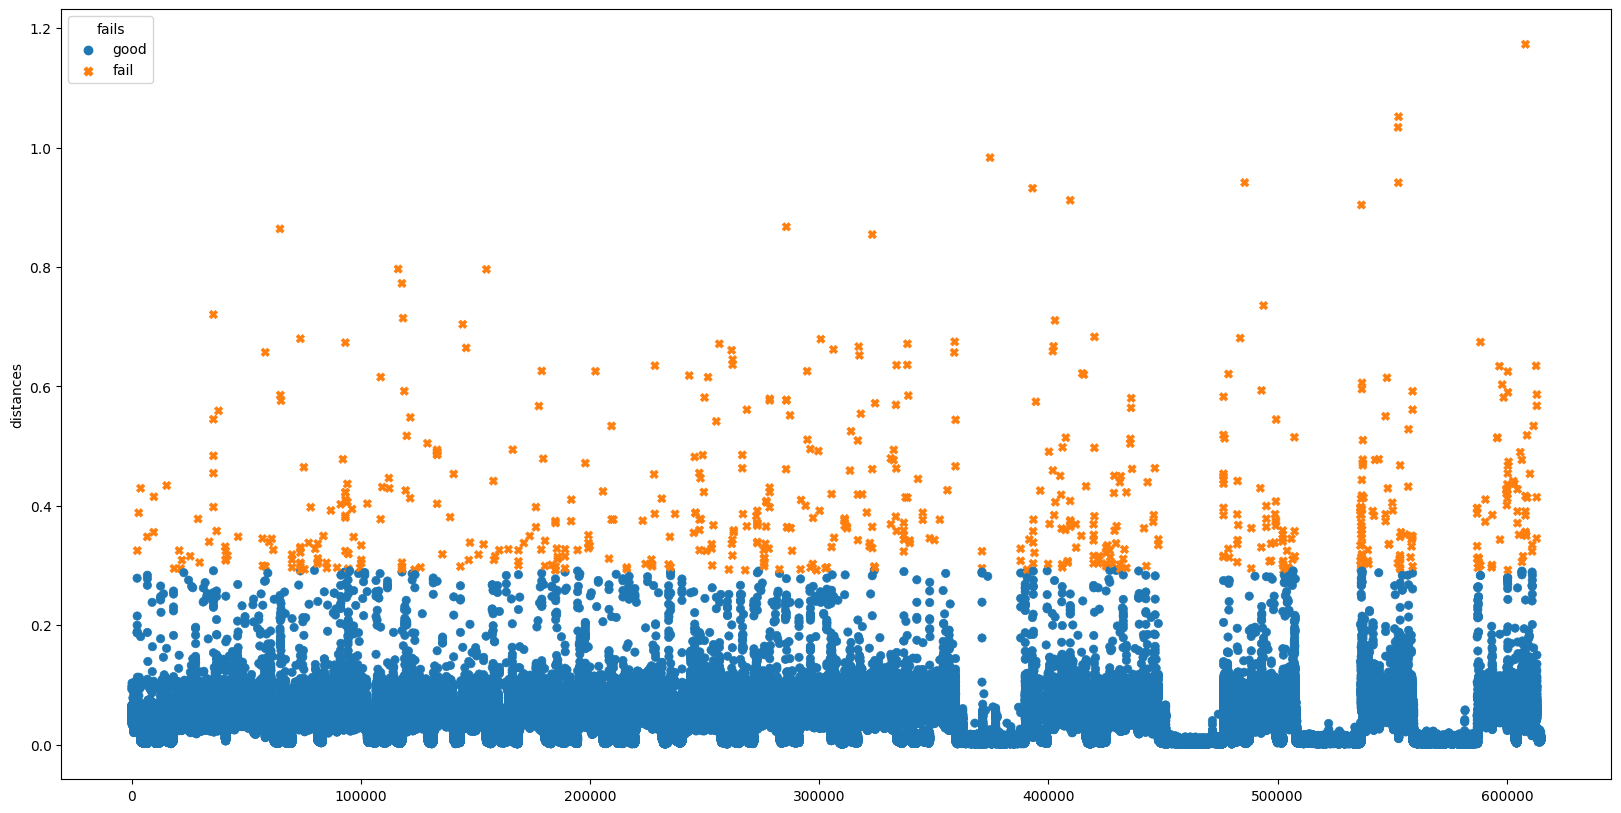

In [74]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(data = X_labeled, x = range(0,614835), y = "distances", hue = "fails", style= "fails", edgecolor = None)

_____________________________________________________________________________________________________________

## Isolation Forest

In [75]:
from sklearn.ensemble import IsolationForest

Asumiendo 3% de defectuosos

In [76]:
IForest = IsolationForest(random_state=0, contamination= 0.03).fit(X)

In [77]:
import pickle

#Para guardar el modelo
IForestPickle = open('L1_IForestModel', 'wb') 
      
# source, destination 
pickle.dump(IForest, IForestPickle)  

# close the file
IForestPickle.close()
                
      
# load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

Para predecir un dato nuevo con Isolation Forest (suponiendo que llega con el mismo formato que los datos):

In [94]:
#**Formateo de la observación nueva**
test = pd.read_csv("ProdL1_202301121021.csv", sep = ";").iloc[0,:].to_frame()
test = test.transpose()
test = test.drop(columns = 'data', axis = 1) #Se quita la columna de fechas
#Se quitan las columnas descartadas en el analisis
columns = [5,6,21,22,33,39]
for i in range(44, 79):
    columns.append(i)
test = test.drop(columns=test.columns[columns], axis = 1)

# load the model from disk
ScalerLoaded = pickle.load(open('L1Scaler', 'rb'))
test = pd.DataFrame(Scaler.transform(test))
test

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.408333,0.544503,0.721311,0.551282,0.728571,0.882353,0.9,1.0,0.181818,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.152675,0.147259,0.0,0.083791,0.08401


In [73]:
#**Predecimos cargando el modelo**
IForestLoaded = pickle.load(open('L1_IForestModel', 'rb'))
prediction = IForestLoaded.predict(test) 
prediction[0]

NameError: name 'pickle' is not defined

## Fuera de rango

In [2]:
import pandas as pd
import numpy as np

Formateo de datos y eliminación de variable no relevantes

In [3]:
Prod1 = pd.read_csv("ProdL1_202301121021.csv", sep = ";")
Prod1 = Prod1.drop(columns = 'data', axis = 1)
columns = [5,6,21,22,33,39]
for i in range(44, 79):
    columns.append(i)
Prod1 = Prod1.drop(columns=Prod1.columns[columns], axis = 1)
Prod1 = Prod1.fillna(method='bfill', axis=0)
Prod1

,temp_iso,temp_pol1,temp_pol2,temp_recirc_iso,temp_recirc_pol,pres_recirc_cat1,pres_recirc_cat2,pres_recirc_cat3,pres_alimentacion_pol,pres_alimentacion_iso,...,consumo_total_pol1,consumo_total_iso,consumo_total_cat1,consumo_total_cat2,consumo_total_pent,consumo_parcial_pol1,consumo_parcial_iso,consumo_parcial_cat1,consumo_parcial_cat2,consumo_parcial_pent
0,25.7,27.1,26.4,24.1,25.4,1.5,1.6,1.1,3.9,2.5,...,86956.9,126407.4,126902.8,3680.8,3910.3,467.4,728.8,0.0,18.3,17.6
1,25.7,27.1,26.4,24.2,25.4,1.5,1.6,1.1,4.0,2.5,...,86958.1,126409.1,126902.8,3680.9,3910.4,468.5,730.6,0.0,18.4,17.7
2,25.7,27.1,26.3,24.2,25.4,1.5,1.6,1.1,4.1,2.5,...,86959.3,126410.9,126902.8,3680.9,3910.4,469.6,732.3,0.0,18.4,17.7
3,25.6,27.5,26.3,24.2,25.3,1.5,1.6,1.1,3.9,2.5,...,86960.5,126412.6,126902.8,3681.0,3910.5,470.6,734.0,0.0,18.5,17.8
4,25.7,27.7,26.3,24.1,25.4,1.5,1.6,1.1,4.0,2.5,...,86961.7,126414.3,126902.8,3681.0,3910.5,471.8,735.8,0.0,18.5,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614830,23.1,24.5,21.4,17.8,17.5,1.4,1.6,1.1,1.5,3.1,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0
614831,23.1,24.5,21.4,17.9,17.5,1.4,1.6,1.1,1.5,3.4,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0
614832,23.1,24.5,21.3,17.7,17.5,1.4,1.6,1.1,1.5,3.2,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0
614833,23.1,24.5,21.3,17.7,17.5,1.4,1.6,1.1,1.5,3.2,...,353162.3,528124.9,2064520.8,16083.7,16543.8,0.0,0.0,0.0,0.0,0.0


Se deja un 2% hacia arriba y hacia abajo en los intervalos

In [15]:
Intervals = {}
for i in Prod1.columns:
    Intervals[i] = (Prod1[i].quantile(0.02), Prod1[i].quantile(0.98))

Intervals

{'temp_iso': (21.9, 31.1),
 'temp_pol1': (20.6, 28.1),
 'temp_pol2': (18.0, 27.7),
 'temp_recirc_iso': (17.1, 26.6),
 'temp_recirc_pol': (16.8, 25.7),
 'pres_recirc_cat1': (0.0, 1.5),
 'pres_recirc_cat2': (0.8, 1.7),
 'pres_recirc_cat3': (0.1, 1.1),
 'pres_alimentacion_pol': (1.5, 9.0),
 'pres_alimentacion_iso': (1.5, 4.2),
 'pres_alimentacion_pent': (0.0, 2.7),
 'pres_recirc_iso': (1.0, 148.0),
 'pres_recirc_pol': (0.0, 146.0),
 'pres_recirc_pent': (0.0, 133.0),
 'caudal_pol': (0.0, 513.0),
 'caudal_iso': (0.0, 736.0),
 'caudal_pent': (0.0, 26.17),
 'caudal_cat1': (0.0, 8.97),
 'caudal_cat2': (1.62, 29.07),
 'nivel_cat1': (49.6, 55.6),
 'nivel_cat2': (45.9, 69.9),
 'nivel_cat3': (75.5, 76.3),
 'nivel_iso': (75.2, 80.2),
 'nivel_pol1': (42.0, 78.1),
 'nivel_pol2': (40.5, 88.8),
 'veloc_prensa': (14.34, 16.48),
 'veloc_perf_sup': (81.85, 96.3),
 'veloc_perf_inf': (2330.65, 8817.036399999999),
 'consumo_total_pol1': (92410.9, 349507.68799999997),
 'consumo_total_iso': (134191.4, 522078.3

Comprobamos en una observación si alguna de sus variable se sale de los intervalos:

In [16]:
#**Formateo de la observación nueva**
test = pd.read_csv("ProdL1_202301121021.csv", sep = ";").iloc[0,:].to_frame()
test = test.transpose()
test = test.drop(columns = 'data', axis = 1) #Se quita la columna de fechas
#Se quitan las columnas descartadas en el analisis
columns = [5,6,21,22,33,39]
for i in range(44, 79):
    columns.append(i)
test = test.drop(columns=test.columns[columns], axis = 1)
test

,temp_iso,temp_pol1,temp_pol2,temp_recirc_iso,temp_recirc_pol,pres_recirc_cat1,pres_recirc_cat2,pres_recirc_cat3,pres_alimentacion_pol,pres_alimentacion_iso,...,consumo_total_pol1,consumo_total_iso,consumo_total_cat1,consumo_total_cat2,consumo_total_pent,consumo_parcial_pol1,consumo_parcial_iso,consumo_parcial_cat1,consumo_parcial_cat2,consumo_parcial_pent
0,25.7,27.1,26.4,24.1,25.4,1.5,1.6,1.1,3.9,2.5,...,86956.9,126407.4,126902.8,3680.8,3910.3,467.4,728.8,0.0,18.3,17.6


In [17]:
for i in test.columns:
    if (test[i][0] > Intervals[i][1]) or (test[i][0] < Intervals[i][0]):
        print("¡Atención! Fuera de rango en la variable: ",i)

¡Atención! Fuera de rango en la variable:  veloc_perf_inf
¡Atención! Fuera de rango en la variable:  consumo_total_pol1
¡Atención! Fuera de rango en la variable:  consumo_total_iso
¡Atención! Fuera de rango en la variable:  consumo_total_cat2
¡Atención! Fuera de rango en la variable:  consumo_total_pent
